Please enter keyword or hashtag to search: Amel Bent
Please enter how many tweets to analyze: 1000
648


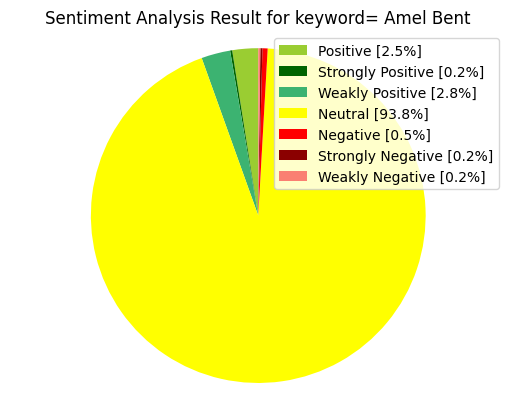

In [6]:
import pandas as pd
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt

consumer_key = 'uGhQtMMFd6TO9QnLHhifPrtOO'
consumer_key_secret = 'eq7DkZEVHzq8oPdzLzfyWkoKQ8WEbGV35Myslqs51faqIYNVqh'

access_token = '1468196573108707328-0OBKv7IxRHuYYOYq49hqODxAgZLwsv'
access_token_secret = 'Kj1bIr90sOqnTo5s91k2Sm0jAvPNaXngxjaOSVx3D6Pug'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

def percentage(part,whole):
 return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

strong_pos=0
pos = 0
weak_pos=0
neutral=0
strong_neg=0
neg = 0
weak_neg=0

tweet_list = []
neutral_list = []
strong_neg_list = []
strong_pos_list = []

s=0

for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = analysis.sentiment[0]
    if score==0:
        neutral+=1
        neutral_list.append(tweet.text)
        s+=1
    elif 0<score<=0.4:
        weak_pos+=1
        s+=1
    elif 0.4<score<=0.8:
        pos+=1
        s+=1
    elif 0.8<score<=1:
        strong_pos+=1
        strong_pos_list.append(tweet.text)
        s+=1
    elif 0>score>=-0.4:
        weak_neg+=1
        s+=1
    elif -0.4>score>=-0.8:
        neg+=1
        s+=1
    else:
        strong_neg+=1
        strong_neg_list.append(tweet.text)
        s+=1

 
print(s)
strong_pos = format(percentage(strong_pos, len(tweet_list)),'.1f')
strong_neg = format(percentage(strong_neg, len(tweet_list)),'.1f')
weak_pos = format(percentage(weak_pos, len(tweet_list)),'.1f')
weak_neg = format(percentage(weak_neg, len(tweet_list)),'.1f')
pos = format(percentage(pos, len(tweet_list)),'.1f')
neg = format(percentage(neg, len(tweet_list)),'.1f')
neutral = format(percentage(neutral, len(tweet_list)),'.1f')

labels = ['Positive ['+str(pos)+'%]','Strongly Positive ['+str(strong_pos)+'%]','Weakly Positive ['+str(weak_pos)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(neg)+'%]','Strongly Negative ['+str(strong_neg)+'%]','Weakly Negative ['+str(weak_neg)+'%]']
sizes = [pos,strong_pos,weak_pos, neutral, neg,strong_neg,weak_neg]
colors = ['yellowgreen','darkgreen','mediumseagreen','yellow','red','darkred','salmon']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()




In [1]:
strong_pos = 30
strong_neg = 20
weak_pos = 10
weak_neg = 40
pos = 2
neg = 19
neutral = 15

dic={strong_pos:'Strongly Positive',strong_neg:'Strongly Negative',neg:'Negative',pos:'Positive',weak_neg:'Weakly Negative',weak_pos:'Weakly Positive',neutral:'Neutral'}
max=max(strong_pos,strong_neg,weak_pos,weak_neg,pos,neg,neutral)
print("General Report:\n",dic[max])

General Report:
 Weakly Negative
